In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
plt.rcParams['font.family'] = "Malgun Gothic"

In [8]:
housing = pd.read_csv('data/housing.csv')

In [9]:
print("데이터 정보 : ")
print(housing.info())
print("데이터 통계")
print(housing.describe())

데이터 정보 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
데이터 통계
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003

In [10]:
#데이터를 볼 때 빈걸 채울까? 범주형 데이터가 있나? 수치형 데이터는 뭐지?

In [23]:
print("\n결측치 계수")
print(housing.isnull().sum())


결측치 계수
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [12]:
# 캘리포니아 집 값 예측
# median_house_value  20640 non-null  float64 집 값

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20640,) and arg 1 with shape (20640, 10).

c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


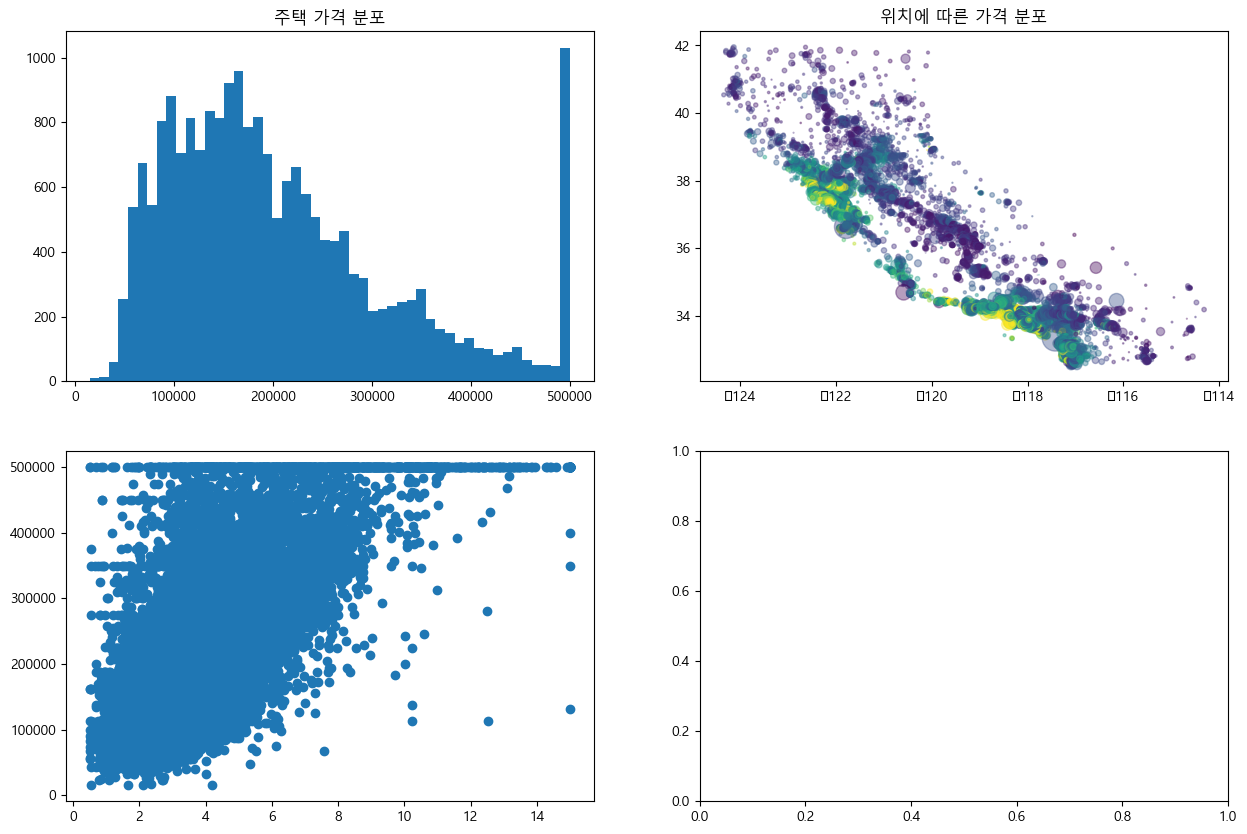

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(housing["median_house_value"],bins=50)
plt.title("주택 가격 분포")
plt.subplot(2,2,2)
plt.scatter(housing['longitude'],housing['latitude']
            ,alpha=0.4
            ,s=housing["population"]/100
            ,c=housing["median_house_value"]
            ,cmap='viridis')
plt.title("위치에 따른 가격 분포")
plt.subplot(2,2,3)
plt.scatter(housing['median_income'],housing['median_house_value'])
plt.subplot(2,2,4)
plt.bar(housing['median_house_value'].index,housing['median_house_value'].values)
plt.title('주택 가격과 상관관계')

In [28]:
X = housing.drop(["median_house_value"],axis=1)
y = housing['median_house_value']

In [31]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
#범주형
categorical_feat = ["ocean_proximity"]
#숫자형
numerical_feat = X.select_dtypes(include=['int64', "float64"]).columns

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#numerical_feat
#SimpleImputer
#StandardScalr
numerical_transformer = Pipeline([('imputer',SimpleImputer(strategy='median')),
          ('scaler', StandardScaler())
           ])

In [39]:
categorical_transformer = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                                     ('onehot',OneHotEncoder())])